<a href="https://colab.research.google.com/github/nabigwaku/Git-Workflow-/blob/master/Look_through.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Uploading data

In [ ]:
from google.colab import files
import zipfile as zp
import pandas as pd
import numpy as np

upload = files.upload()


Saving sb_cancellations (2).zip to sb_cancellations (2).zip


## Reading zip file

In [ ]:
df = pd.read_csv('/content/sb_cancellations (2).zip', compression= 'zip')

df.head()

,trip_id,trip_date,passenger_id,driver_id,parish,subcounty,ping_requested,pair_requested,passenger_cancelled,driver_arrived,started_trip,ended_trip,current_state,driver_distance_at_acceptance
0,66767632,11/01/2020 09:04,1111979,218472.0,BUKOTO I,Nakawa,11/01/2020 09:04,NaN,NaN,11/01/2020 09:07,11/01/2020 09:11,11/01/2020 09:16,droppedoff,119.0
1,66763668,11/01/2020 08:10,924323,429.0,BUKASA,Makindye,11/01/2020 08:10,NaN,NaN,11/01/2020 08:11,11/01/2020 08:13,11/01/2020 08:26,droppedoff,516.0
2,66795456,11/01/2020 13:28,1093472,32524.0,KIBULI,Makindye,11/01/2020 13:28,NaN,11/01/2020 13:28,11/01/2020 13:28,NaN,NaN,passengercancelled,127.0
3,66831064,11/01/2020 18:51,998368,436536.0,CIVIC CENTRE,Central,11/01/2020 18:51,NaN,NaN,11/01/2020 18:54,11/01/2020 18:54,11/01/2020 19:13,droppedoff,51.0
4,66791524,11/01/2020 12:53,492205,156633.0,NTINDA,Nakawa,11/01/2020 12:53,NaN,NaN,11/01/2020 13:17,11/01/2020 13:17,11/01/2020 13:31,droppedoff,745.0


In [ ]:
columns_names = df.columns
columns_names

Index(['trip_id', 'trip_date', 'passenger_id', 'driver_id', 'parish',
       'subcounty', 'ping_requested', 'pair_requested', 'passenger_cancelled',
       'driver_arrived', 'started_trip', 'ended_trip', 'current_state',
       'driver_distance_at_acceptance'],
      dtype='object')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 163851 entries, 0 to 163850
Data columns (total 14 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   trip_id                        163851 non-null  int64  
 1   trip_date                      163851 non-null  object 
 2   passenger_id                   163851 non-null  int64  
 3   driver_id                      163847 non-null  float64
 4   parish                         162428 non-null  object 
 5   subcounty                      162418 non-null  object 
 6   ping_requested                 141135 non-null  object 
 7   pair_requested                 22716 non-null   object 
 8   passenger_cancelled            39500 non-null   object 
 9   driver_arrived                 125978 non-null  object 
 10  started_trip                   124353 non-null  object 
 11  ended_trip                     124351 non-null  object 
 12  current_state                 

## Question 1:: What percentage of ride requests are cancelled?

In [ ]:
trip_requests = df['trip_id'].count()
print('trip_requests: ',trip_requests)
passenger_cancelled_requests = df['passenger_cancelled'].count()
print('\npassenger_cancelled_requests: ',passenger_cancelled_requests)

passenger_cancellation_rate = (passenger_cancelled_requests/trip_requests)*100
print('\npassenger_cancellation_rate: ',passenger_cancellation_rate)

## counting trip_ids where current_state is dropped ooff
## filter where df[df['current_state'] == 'droppedoff']
completed_requests = df[df['current_state'] == 'droppedoff']['trip_id'].count()
print('\ncompleted_requests: ',completed_requests)

break_down = df.groupby('current_state')['trip_id'].count()
print('\nbreak_down: ',break_down)

trip_requests:  163851

passenger_cancelled_requests:  39500

passenger_cancellation_rate:  24.10726818878127

completed_requests:  124351

break_down:  current_state
droppedoff            124351
passengercancelled     39500
Name: trip_id, dtype: int64


## Question 2: Immediately Re-Order Check

### 2.1 create a re-order column

#### sorting by passenger_id and trip-date

In [ ]:
# dort the values by passenger_id and trip_date
sorted_df = df.sort_values(by = ['passenger_id','trip_date'])
sorted_df.head()

,trip_id,trip_date,passenger_id,driver_id,parish,subcounty,ping_requested,pair_requested,passenger_cancelled,driver_arrived,started_trip,ended_trip,current_state,driver_distance_at_acceptance
58664,66787636,11/01/2020 12:17,2,791361.0,BUGOLOBI,Nakawa,11/01/2020 12:17,NaN,NaN,11/01/2020 12:20,11/01/2020 12:24,11/01/2020 12:36,droppedoff,205.0
7901,66879204,12/01/2020 12:31,2,537692.0,BUGOLOBI,Nakawa,12/01/2020 12:31,NaN,NaN,12/01/2020 12:35,12/01/2020 12:37,12/01/2020 12:46,droppedoff,303.0
103637,67370252,15/01/2020 23:32,2,785912.0,NaN,NaN,15/01/2020 23:32,NaN,15/01/2020 23:35,NaN,NaN,NaN,passengercancelled,246.0
136354,67174332,14/01/2020 17:34,5,801184.0,KIREKA,Nakawa,NaN,14/01/2020 17:34,NaN,14/01/2020 17:34,14/01/2020 17:34,14/01/2020 17:45,droppedoff,107.0
10765,66986664,13/01/2020 13:22,19,583722.0,KIREKA,Nakawa,13/01/2020 13:22,NaN,13/01/2020 13:26,NaN,NaN,NaN,passengercancelled,644.0


#### checking if previous passenger_id = current row passenger id

Example: Shift() == lag (moves down), shift(-1) == lead (moves up), eq() acts as equivalent

In [ ]:
# Sample DataFrame
data = {'passenger_id': [1111979, 924323, 1093472, 998368, 492205]}
ds = pd.DataFrame(data)

# Shift down (default, behaves like lag)
ds['shift_down'] = ds['passenger_id'].shift()

# Shift up (behaves like lead)
ds['shift_up'] = ds['passenger_id'].shift(-1)

ds['compare']  = ds['passenger_id'] == ds['passenger_id'].shift()

print(ds)

   passenger_id  shift_down   shift_up  compare
0       1111979         NaN   924323.0    False
1        924323   1111979.0  1093472.0    False
2       1093472    924323.0   998368.0    False
3        998368   1093472.0   492205.0    False
4        492205    998368.0        NaN    False


back to the work

In [ ]:
# creates new column with the lag of passenger_id, however since its always a float due to the 1st null or last null in lag == shift() or lead ()  == shift(-1), you need to convert it to int and fill na with zero
sorted_df['prev_passenger_id'] = sorted_df['passenger_id'].shift()
## fill na with 0 and convert to int
sorted_df['prev_passenger_id'] = sorted_df['prev_passenger_id'].fillna(0).astype(int)

## make comparison for reorder and map true for yes and false for no
sorted_df['re-order'] = (sorted_df['passenger_id'] == sorted_df['prev_passenger_id']).map({True: 'yes', False: 'no'})
sorted_df.head()

,trip_id,trip_date,passenger_id,driver_id,parish,subcounty,ping_requested,pair_requested,passenger_cancelled,driver_arrived,started_trip,ended_trip,current_state,driver_distance_at_acceptance,prev_passenger_id,re-order
58664,66787636,11/01/2020 12:17,2,791361.0,BUGOLOBI,Nakawa,11/01/2020 12:17,NaN,NaN,11/01/2020 12:20,11/01/2020 12:24,11/01/2020 12:36,droppedoff,205.0,0,no
7901,66879204,12/01/2020 12:31,2,537692.0,BUGOLOBI,Nakawa,12/01/2020 12:31,NaN,NaN,12/01/2020 12:35,12/01/2020 12:37,12/01/2020 12:46,droppedoff,303.0,2,yes
103637,67370252,15/01/2020 23:32,2,785912.0,NaN,NaN,15/01/2020 23:32,NaN,15/01/2020 23:35,NaN,NaN,NaN,passengercancelled,246.0,2,yes
136354,67174332,14/01/2020 17:34,5,801184.0,KIREKA,Nakawa,NaN,14/01/2020 17:34,NaN,14/01/2020 17:34,14/01/2020 17:34,14/01/2020 17:45,droppedoff,107.0,2,no
10765,66986664,13/01/2020 13:22,19,583722.0,KIREKA,Nakawa,13/01/2020 13:22,NaN,13/01/2020 13:26,NaN,NaN,NaN,passengercancelled,644.0,5,no


#### I need to shift the trip_date too, then calculate the trip_date diff only for where re-order is yes

2.2 create an immediate reorder column

In [ ]:
# creating new column for prev_trip_date

sorted_df['prev_trip_date'] = sorted_df['trip_date'].shift()

## make sure the date columns are in date time
sorted_df['trip_date'] = pd.to_datetime(sorted_df['trip_date'], dayfirst=True)
sorted_df['prev_trip_date'] = pd.to_datetime(sorted_df['prev_trip_date'], dayfirst=True)

## selecting where re-order is yes using loc, then create a column and assign the trip_date_diff
sorted_df['trip_date_diff_mins'] = None  # Initialize the column to None
sorted_df.loc[sorted_df['re-order'] == 'yes', 'trip_date_diff_mins'] = (sorted_df['trip_date'] - sorted_df['prev_trip_date']).dt.total_seconds()/60
sorted_df['imediate_re_order'] = (sorted_df['trip_date_diff_mins'] <= 10).map({True : 'yes', False : 'no'}) # imediate reorder under 10 mins

sorted_df.head()

,trip_id,trip_date,passenger_id,driver_id,parish,subcounty,ping_requested,pair_requested,passenger_cancelled,driver_arrived,started_trip,ended_trip,current_state,driver_distance_at_acceptance,prev_passenger_id,re-order,prev_trip_date,trip_date_diff_mins,imediate_re_order
58664,66787636,2020-01-11 12:17:00,2,791361.0,BUGOLOBI,Nakawa,11/01/2020 12:17,NaN,NaN,11/01/2020 12:20,11/01/2020 12:24,11/01/2020 12:36,droppedoff,205.0,0,no,NaT,None,no
7901,66879204,2020-01-12 12:31:00,2,537692.0,BUGOLOBI,Nakawa,12/01/2020 12:31,NaN,NaN,12/01/2020 12:35,12/01/2020 12:37,12/01/2020 12:46,droppedoff,303.0,2,yes,2020-01-11 12:17:00,1454.0,no
103637,67370252,2020-01-15 23:32:00,2,785912.0,NaN,NaN,15/01/2020 23:32,NaN,15/01/2020 23:35,NaN,NaN,NaN,passengercancelled,246.0,2,yes,2020-01-12 12:31:00,4981.0,no
136354,67174332,2020-01-14 17:34:00,5,801184.0,KIREKA,Nakawa,NaN,14/01/2020 17:34,NaN,14/01/2020 17:34,14/01/2020 17:34,14/01/2020 17:45,droppedoff,107.0,2,no,2020-01-15 23:32:00,None,no
10765,66986664,2020-01-13 13:22:00,19,583722.0,KIREKA,Nakawa,13/01/2020 13:22,NaN,13/01/2020 13:26,NaN,NaN,NaN,passengercancelled,644.0,5,no,2020-01-14 17:34:00,None,no


In [ ]:
immediatly_re_ordered_trips = sorted_df[sorted_df['imediate_re_order'] == 'yes']['trip_id'].count()

print('immediatly_re_ordered_trips: ',immediatly_re_ordered_trips)

immediatly_re_ordered_trips:  8981


#### How many times do passengers cancel and re-order

In [ ]:
# adding cancel column to show if they had previously cancelced

sorted_df['prev_state']  = sorted_df['current_state'].shift()
sorted_df.head()

,trip_id,trip_date,passenger_id,driver_id,parish,subcounty,ping_requested,pair_requested,passenger_cancelled,driver_arrived,started_trip,ended_trip,current_state,driver_distance_at_acceptance,prev_passenger_id,re-order,prev_trip_date,trip_date_diff_mins,imediate_re_order,prev_state
58664,66787636,2020-01-11 12:17:00,2,791361.0,BUGOLOBI,Nakawa,11/01/2020 12:17,NaN,NaN,11/01/2020 12:20,11/01/2020 12:24,11/01/2020 12:36,droppedoff,205.0,0,no,NaT,None,no,None
7901,66879204,2020-01-12 12:31:00,2,537692.0,BUGOLOBI,Nakawa,12/01/2020 12:31,NaN,NaN,12/01/2020 12:35,12/01/2020 12:37,12/01/2020 12:46,droppedoff,303.0,2,yes,2020-01-11 12:17:00,1454.0,no,droppedoff
103637,67370252,2020-01-15 23:32:00,2,785912.0,NaN,NaN,15/01/2020 23:32,NaN,15/01/2020 23:35,NaN,NaN,NaN,passengercancelled,246.0,2,yes,2020-01-12 12:31:00,4981.0,no,droppedoff
136354,67174332,2020-01-14 17:34:00,5,801184.0,KIREKA,Nakawa,NaN,14/01/2020 17:34,NaN,14/01/2020 17:34,14/01/2020 17:34,14/01/2020 17:45,droppedoff,107.0,2,no,2020-01-15 23:32:00,None,no,passengercancelled
10765,66986664,2020-01-13 13:22:00,19,583722.0,KIREKA,Nakawa,13/01/2020 13:22,NaN,13/01/2020 13:26,NaN,NaN,NaN,passengercancelled,644.0,5,no,2020-01-14 17:34:00,None,no,droppedoff


In [ ]:
# counting re_order for each past state

pivot_table = pd.pivot_table(sorted_df,
                             index = ['prev_state','imediate_re_order'],
                             values = 'trip_id',
                             aggfunc = 'count'
                             )
print(pivot_table)

## adding grandtotal percentage for each 'prev_state'
total_per_state = pivot_table.groupby('prev_state')['trip_id'].sum()
print('\n total_per_state: ',total_per_state)

## then add it to the picot table

pivot_table['percentage_per_state'] = (pivot_table['trip_id']/total_per_state)*100

print('\n added percentage')
print(pivot_table)




                                      trip_id
prev_state         imediate_re_order         
droppedoff         no                  123869
                   yes                    481
passengercancelled no                   31000
                   yes                   8500

 total_per_state:  prev_state
droppedoff            124350
passengercancelled     39500
Name: trip_id, dtype: int64

 added percentage
                                      trip_id  percentage_per_state
prev_state         imediate_re_order                               
droppedoff         no                  123869             99.613189
                   yes                    481              0.386811
passengercancelled no                   31000             78.481013
                   yes                   8500             21.518987


## 3. What are the most common reasons for passenger cancellations?

### Sub-Questions:
1. Which days of the week have the highest cancellation rates?
2. Which times of day have the highest cancellation rates?
3. How long do passengers wait before they cancel a trip?
4. What is the distance between the customer and the driver?

In [ ]:
# Convert trip_date to datetime format
sorted_df['trip_date'] = pd.to_datetime(sorted_df['trip_date'], dayfirst= True)

# Extract date, month, year, and hour of day
sorted_df['date'] = sorted_df['trip_date'].dt.date
sorted_df['month'] = sorted_df['trip_date'].dt.month
sorted_df['year'] = sorted_df['trip_date'].dt.year
sorted_df['hour'] = sorted_df['trip_date'].dt.hour  # Extract hour of the day
sorted_df['day_of_week'] = sorted_df['trip_date'].dt.day_name()


# Group by year, date, and current_state, then calculate the average distance
driver_dist_at_state = sorted_df.groupby([
    'year',
    'date',
    'day_of_week',
    'current_state'
])['driver_distance_at_acceptance'].mean().reset_index()

# Rename the columns for clarity
driver_dist_at_state.columns = ['year', 'date', 'day_of_week', 'ride_state', 'avg_distance']

# Display the result
print(driver_dist_at_state)

    year        date day_of_week          ride_state  avg_distance
0   2020  2020-01-11    Saturday          droppedoff    194.705004
1   2020  2020-01-11    Saturday  passengercancelled    319.820542
2   2020  2020-01-12      Sunday          droppedoff    266.781484
3   2020  2020-01-12      Sunday  passengercancelled    439.776590
4   2020  2020-01-13      Monday          droppedoff    218.421837
5   2020  2020-01-13      Monday  passengercancelled    361.975998
6   2020  2020-01-14     Tuesday          droppedoff    210.735226
7   2020  2020-01-14     Tuesday  passengercancelled    370.858369
8   2020  2020-01-15   Wednesday          droppedoff    214.029586
9   2020  2020-01-15   Wednesday  passengercancelled    369.631347
10  2020  2020-01-16    Thursday          droppedoff    201.150023
11  2020  2020-01-16    Thursday  passengercancelled    345.094947
12  2020  2020-01-17      Friday          droppedoff    222.691183
13  2020  2020-01-17      Friday  passengercancelled    361.71

### 1. Which days of the week have the highest cancellation rates?

In [ ]:
total_trips_df = sorted_df.groupby(['day_of_week','current_state'])['trip_id'].count().reset_index()

# Rename the column for clarity
total_trips_df.columns = ['day_of_week', 'current_state', 'total_trips']

#canceled trips
cancelled_trips_df = sorted_df[sorted_df['current_state'] == 'passengercancelled'].groupby('day_of_week')['trip_id'].count().reset_index()

# Rename the column for clarity
cancelled_trips_df.columns = ['day_of_week', 'canceled_trips']

total_trips = sorted_df.groupby('day_of_week')['trip_id'].count().reset_index()
total_trips.columns = ['day_of_week', 'total_trips']

print(total_trips)
print("")
print(cancelled_trips_df)

## so we have to merge the two on day_of_week and specifiy how
all_cancelled_df = pd.merge(cancelled_trips_df,total_trips, on = 'day_of_week', how = 'left')

## add cancellation_rate
print("\nFinal")
all_cancelled_df['cancellation_rate'] = (1.0*all_cancelled_df['canceled_trips']/all_cancelled_df['total_trips'])*100
all_cancelled_df['rank'] = all_cancelled_df['cancellation_rate'].rank(ascending=False)
all_cancelled_df





  day_of_week  total_trips
0      Friday        27117
1      Monday        25321
2    Saturday        20620
3      Sunday        12792
4    Thursday        25414
5     Tuesday        25925
6   Wednesday        26662

  day_of_week  canceled_trips
0      Friday            6870
1      Monday            6334
2    Saturday            4551
3      Sunday            3166
4    Thursday            6077
5     Tuesday            6090
6   Wednesday            6412

Final


,day_of_week,canceled_trips,total_trips,cancellation_rate,rank
0,Friday,6870,27117,25.334661,1.0
1,Monday,6334,25321,25.014810,2.0
2,Saturday,4551,20620,22.070805,7.0
3,Sunday,3166,12792,24.749844,3.0
4,Thursday,6077,25414,23.912017,5.0
5,Tuesday,6090,25925,23.490839,6.0
6,Wednesday,6412,26662,24.049209,4.0


### 2. Which times of day have the highest cancellation rates?

In [ ]:
# add cancellation count based on time_of_day
# add total_trips count based on time_of_day
# merge the two dfs and calculate cancellation_rate by time of day

can_1 = sorted_df[sorted_df['current_state'] == 'passengercancelled'].groupby('hour')['trip_id'].count().reset_index()
can_1.columns = ['hour','cancelled_trips']

all_trips = sorted_df.groupby('hour')['trip_id'].count().reset_index()
all_trips.columns = ['hour', 'total_trips']

# merge
cancelled_by_time_of_day_df = pd.merge(all_trips,can_1, on = 'hour', how = 'left')
## create cancellation rate column
cancelled_by_time_of_day_df['cancellation_rate'] = (1.0*cancelled_by_time_of_day_df['cancelled_trips']/cancelled_by_time_of_day_df['total_trips'])*100
cancelled_by_time_of_day_df['rank'] = cancelled_by_time_of_day_df['cancellation_rate'].rank(ascending= False)
cancelled_by_time_of_day_df

,hour,total_trips,cancelled_trips,cancellation_rate,rank
0,0,1160,331,28.534483,3.0
1,1,538,165,30.669145,2.0
2,2,285,81,28.421053,4.0
3,3,160,43,26.875000,6.0
4,4,166,46,27.710843,5.0
5,5,302,103,34.105960,1.0
6,6,1249,300,24.019215,16.0
7,7,5351,1318,24.630910,15.0
8,8,7815,1825,23.352527,19.0
9,9,8704,2037,23.403033,18.0


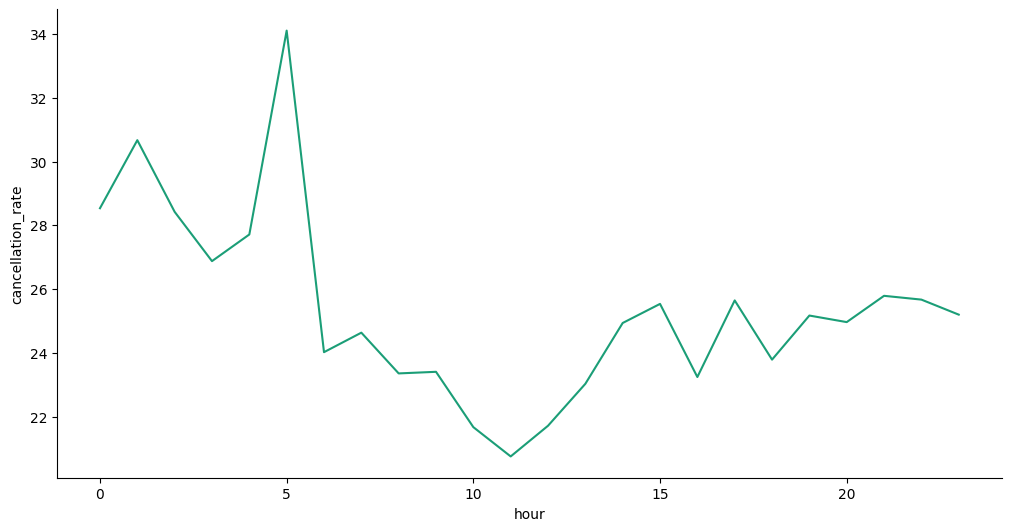

In [ ]:
# @title hour vs cancellation_rate

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['hour']
  ys = series['cancellation_rate']

  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = cancelled_by_time_of_day_df.sort_values('hour', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('hour')
_ = plt.ylabel('cancellation_rate')

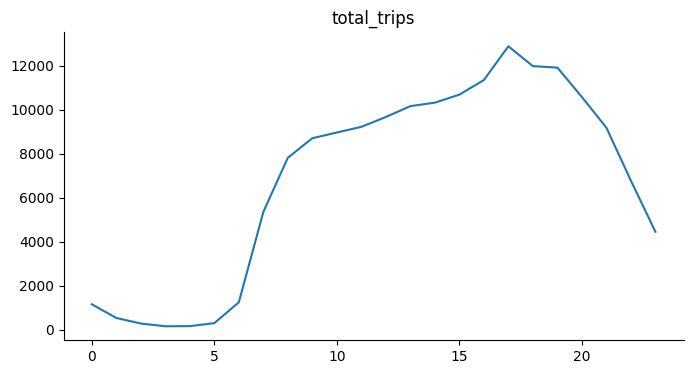

In [ ]:
# @title total_trips

from matplotlib import pyplot as plt
cancelled_by_time_of_day_df['total_trips'].plot(kind='line', figsize=(8, 4), title='total_trips')
plt.gca().spines[['top', 'right']].set_visible(False)

### 3. How long do passengers wait before they cancel a trip?

In [ ]:
sorted_df.head()

,trip_id,trip_date,passenger_id,driver_id,parish,subcounty,ping_requested,pair_requested,passenger_cancelled,driver_arrived,...,re-order,prev_trip_date,trip_date_diff_mins,imediate_re_order,prev_state,date,month,year,hour,day_of_week
58664,66787636,2020-01-11 12:17:00,2,791361.0,BUGOLOBI,Nakawa,11/01/2020 12:17,NaN,NaN,11/01/2020 12:20,...,no,NaT,None,no,None,2020-01-11,1,2020,12,Saturday
7901,66879204,2020-01-12 12:31:00,2,537692.0,BUGOLOBI,Nakawa,12/01/2020 12:31,NaN,NaN,12/01/2020 12:35,...,yes,2020-01-11 12:17:00,1454.0,no,droppedoff,2020-01-12,1,2020,12,Sunday
103637,67370252,2020-01-15 23:32:00,2,785912.0,NaN,NaN,15/01/2020 23:32,NaN,15/01/2020 23:35,NaN,...,yes,2020-01-12 12:31:00,4981.0,no,droppedoff,2020-01-15,1,2020,23,Wednesday
136354,67174332,2020-01-14 17:34:00,5,801184.0,KIREKA,Nakawa,NaN,14/01/2020 17:34,NaN,14/01/2020 17:34,...,no,2020-01-15 23:32:00,None,no,passengercancelled,2020-01-14,1,2020,17,Tuesday
10765,66986664,2020-01-13 13:22:00,19,583722.0,KIREKA,Nakawa,13/01/2020 13:22,NaN,13/01/2020 13:26,NaN,...,no,2020-01-14 17:34:00,None,no,droppedoff,2020-01-13,1,2020,13,Monday


In [ ]:
# make sure their are casted to date and time
sorted_df['ping_requested'] = pd.to_datetime(sorted_df['ping_requested'], dayfirst= True)
sorted_df['passenger_cancelled'] = pd.to_datetime(sorted_df['passenger_cancelled'], dayfirst= True)

sorted_df['time_to_cancel'] = (sorted_df['passenger_cancelled'] - sorted_df['ping_requested']).dt.total_seconds()/60

time_to_cancel_mean = sorted_df[sorted_df['current_state'] == 'passengercancelled'].groupby('current_state')['time_to_cancel'].mean()
time_to_cancel_median = sorted_df[sorted_df['current_state'] == 'passengercancelled'].groupby('current_state')['time_to_cancel'].median()
time_to_cancel_mode = sorted_df[sorted_df['current_state'] == 'passengercancelled'].groupby('current_state')['time_to_cancel'].apply(lambda x: x.mode())

freq_time_to_cancel = sorted_df.groupby('time_to_cancel')['trip_id'].count()


print('time_to_cancel_mean: ',time_to_cancel_mean)
print('\n time_to_cancel_median: ',time_to_cancel_median)
print('\n time_to_cancel_mode: ',time_to_cancel_mode)
print('\n freq_time_to_cancel:', freq_time_to_cancel)

time_to_cancel_mean:  current_state
passengercancelled    17.960046
Name: time_to_cancel, dtype: float64

 time_to_cancel_median:  current_state
passengercancelled    2.0
Name: time_to_cancel, dtype: float64

 time_to_cancel_mode:  current_state        
passengercancelled  0    1.0
Name: time_to_cancel, dtype: float64

 freq_time_to_cancel: time_to_cancel
0.0        6379
1.0        9844
2.0        7504
3.0        4527
4.0        2650
           ... 
44103.0       1
50650.0       1
54243.0       1
54420.0       1
96481.0       1
Name: trip_id, Length: 211, dtype: int64


In [ ]:
freq_time_to_cancel

,trip_id
time_to_cancel,
0.0,6379
1.0,9844
2.0,7504
3.0,4527
4.0,2650
...,...
44103.0,1
50650.0,1
54243.0,1


### 4. What is the distance between the customer and the driver?

In [ ]:
sorted_df.head()

,trip_id,trip_date,passenger_id,driver_id,parish,subcounty,ping_requested,pair_requested,passenger_cancelled,driver_arrived,...,prev_trip_date,trip_date_diff_mins,imediate_re_order,prev_state,date,month,year,hour,day_of_week,time_to_cancel
58664,66787636,2020-01-11 12:17:00,2,791361.0,BUGOLOBI,Nakawa,2020-01-11 12:17:00,NaN,NaT,11/01/2020 12:20,...,NaT,None,no,None,2020-01-11,1,2020,12,Saturday,NaN
7901,66879204,2020-01-12 12:31:00,2,537692.0,BUGOLOBI,Nakawa,2020-01-12 12:31:00,NaN,NaT,12/01/2020 12:35,...,2020-01-11 12:17:00,1454.0,no,droppedoff,2020-01-12,1,2020,12,Sunday,NaN
103637,67370252,2020-01-15 23:32:00,2,785912.0,NaN,NaN,2020-01-15 23:32:00,NaN,2020-01-15 23:35:00,NaN,...,2020-01-12 12:31:00,4981.0,no,droppedoff,2020-01-15,1,2020,23,Wednesday,3.0
136354,67174332,2020-01-14 17:34:00,5,801184.0,KIREKA,Nakawa,NaT,14/01/2020 17:34,NaT,14/01/2020 17:34,...,2020-01-15 23:32:00,None,no,passengercancelled,2020-01-14,1,2020,17,Tuesday,NaN
10765,66986664,2020-01-13 13:22:00,19,583722.0,KIREKA,Nakawa,2020-01-13 13:22:00,NaN,2020-01-13 13:26:00,NaN,...,2020-01-14 17:34:00,None,no,droppedoff,2020-01-13,1,2020,13,Monday,4.0


In [ ]:
# pick driver_distance_at_acceptance avg, by state

avg_distance = sorted_df['driver_distance_at_acceptance'].mean()
avg_distance_by_state = sorted_df.groupby('current_state')['driver_distance_at_acceptance'].mean()

print('avg_distance: ',avg_distance)
print('\n avg_distance_by_state: ', avg_distance_by_state)

avg_distance:  236.78706121663598

 avg_distance_by_state:  current_state
droppedoff            215.167905
passengercancelled    363.715129
Name: driver_distance_at_acceptance, dtype: float64
